# Notebook error analysis 

## Libraries and exception types

#### rules for extracting related libs from crash lines:

    (not included) 1. Uninteresting error types even without knowing if any libraries are involved:
        NameError?, FileNotFoundError, OSError, KeyboardInterrupt?, ModuleNotFoundError?, AssertionError?
    2. compile a list of popular libraries used in data science and ML
        1. if library name is in error value. e.g., 
            TypeError: 'numpy.float64' object is not callable
            AttributeError: module 'torchvision.transforms.v2' has no attribute 'CutMix'
        2. for pattern "----> line_number xx.yy", check if xx is alias of an import library
        ??? 3. similarly, for yy, can check if the property name is from a library. Do not know how.
        4. for some type errors and attribute errors, where to check the object name is from which library.
            AttributeError: 'Sequential' object has no attribute 'predict_classes'
            TypeError: 'AxesSubplot' object is not subscriptable
        ??? 5. for ValueError, certain keywords in error values indicates library names
            broadcast, array, shape -> numpy

In [6]:
# lib2 parsing config
import pickle

#error_type_ignore = ["nameerror", "filenotfounderror", "oserror", "keyboardinterrupt", "modulenotfounderror", "assertionerror"]
lib_names = ["pandas","numpy", "matplotlib","sklearn","seaborn","tensorflow","torch","tqdm","random","xgboost",
             "scipy","plotly","keras","cv2","PIL","math","lightgbm","nltk","torchvision","collections",
             "transformers","catboost","statsmodels","imblearn","wordcloud"]
with open('lib_classes.pickle', 'rb') as f:
    lib_classes_dict = pickle.load(f)


### 1. nbs from github - the stack v1

https://huggingface.co/datasets/bigcode/the-stack-dedup/tree/main/data/jupyter-notebook


In [2]:
# read in all errors from the file
import pandas as pd
import util

df2_err_builtin_exps = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4_exception_types.xlsx')
df2_err_builtin_exps.head()

,fname,ename,evalue,traceback,lib
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"urllib3,selenium"
1,00000-1012-demand-forecasting-data-prep-from-s...,libcustomerrors,"FATAL: no pg_hba.conf entry for host ""75.166....",['--------------------------------------------...,psycopg2
2,00000-1017-heatmapseq2seq.ipynb,valueerror,"x and y must have same first dimension, but ha...",['--------------------------------------------...,matplotlib
3,00000-1023-crawler-20190515-20190516.ipynb,connectionerror,HTTPSConnectionPool(host='www.backpackers.com....,['--------------------------------------------...,"requests,urllib3"
4,00000-1033-peer-solution-predicting-survival-t...,libcustomerrors,<urlopen error [Errno 11001] getaddrinfo failed>,['--------------------------------------------...,pandas


In [2]:
# lib percentage from first general lib extraction -> util.extract_lib
len(df2_err_builtin_exps[~df2_err_builtin_exps["lib"].isnull()])/len(df2_err_builtin_exps)

0.35296669615239423

### 1.1 Extract imported libraries and their alias used in the error notebook dataset

In [5]:
import imports_parser
import pickle
import pandas as pd

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error"
res = imports_parser.get_imports_nbs_static(path_err_nbs+"/nbs", imports_parser.get_imports_line_all)
res_pd = pd.DataFrame.from_dict(res)
res_pd["lib_alias"] = res_pd.imports.apply(imports_parser.get_lib_alias)
res_pd.to_excel(path_err_nbs+"/imports_all_info.xlsx", index=False, engine="xlsxwriter")

Unexpected error converting to json 00279-3344-datasets.ipynb


### 1.1.1 filter only the ones using the selected libraries, based on extracted all imports from error nbs

In [2]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error"
df_imports = pd.read_excel(path_err_nbs + '/imports_all_info.xlsx')

In [3]:
df_imports["lib_alias"] = df_imports.lib_alias.apply(eval)
df_imports_filtered = df_imports.loc[df_imports.lib_alias.apply(lambda imports: any(util.simple_lib_parser(imp[0]) in lib_names for imp in imports))]
print("{0:.2%} of all the GitHub errors notebooks containing errors use the selected libraries".format(len(df_imports_filtered)/len(df_imports)))

81.06% of all the GitHub errors notebooks containing errors use the selected libraries


In [4]:
df_imports_filtered.to_excel(path_err_nbs+"/imports_all_info_filtered_ML.xlsx", index=False, engine="xlsxwriter")

### 1.2 Extract related libraries from crash lines in tracebacks

The second attempt to extracting libs.  -> util.extract_lib_2

In [1]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error"
df_imports = pd.read_excel(path_err_nbs + '/imports_all_info.xlsx')
df2_err_builtin_exps = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4_exception_types.xlsx')
df2_err_builtin_exps.head()

,fname,ename,evalue,traceback,lib
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"urllib3,selenium"
1,00000-1012-demand-forecasting-data-prep-from-s...,libcustomerrors,"FATAL: no pg_hba.conf entry for host ""75.166....",['--------------------------------------------...,psycopg2
2,00000-1017-heatmapseq2seq.ipynb,valueerror,"x and y must have same first dimension, but ha...",['--------------------------------------------...,matplotlib
3,00000-1023-crawler-20190515-20190516.ipynb,connectionerror,HTTPSConnectionPool(host='www.backpackers.com....,['--------------------------------------------...,"requests,urllib3"
4,00000-1033-peer-solution-predicting-survival-t...,libcustomerrors,<urlopen error [Errno 11001] getaddrinfo failed>,['--------------------------------------------...,pandas


In [4]:
df2_err_builtin_exps["lib2"] = df2_err_builtin_exps.apply(util.extract_lib_2, lib_names=lib_names, df_imports=df_imports, lib_classes_dict=lib_classes_dict, axis=1)

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

In [5]:
1-len(df2_err_builtin_exps[df2_err_builtin_exps.lib.isnull()&df2_err_builtin_exps.lib2.isnull()])/len(df2_err_builtin_exps)

0.45626440246327904

In [ ]:
df2_err_builtin_exps["lib_parsed"] = df2_err_builtin_exps["lib2"].fillna(df2_err_builtin_exps["lib"]).map(util.simple_lib_parser)
df2_err_builtin_exps.to_excel(path_err_nbs+"/nberror_g_all_p4_exception_types_lib_parsed.xlsx", index=False, engine='xlsxwriter')

### 1.3 Analyzing crashed libraries in relation to exception types

In [28]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error"
df2_err_builtin_exps = pd.read_excel(path_err_nbs+"/nberror_g_all_p4_exception_types_lib_parsed.xlsx")
sum(~df2_err_builtin_exps["lib_parsed"].isna())/len(df2_err_builtin_exps)

0.456264402463279

In [2]:
df2_err_builtin_exps.lib_parsed.value_counts()[:10]

lib_parsed
pandas        15277
numpy         14134
tensorflow    10156
torch          8294
sklearn        5491
matplotlib     3585
scipy          1247
ipython         980
seaborn         848
cv2             654
Name: count, dtype: int64

### 1.3.1 lib-exception relationship  -  all libs

In [3]:
# lib-exception relationship  -  all libs
for builtin_exp in df2_err_builtin_exps.ename.value_counts().index:
    df2_err_builtin_exp = df2_err_builtin_exps[df2_err_builtin_exps["ename"]==builtin_exp]
    libs_n = df2_err_builtin_exp.lib_parsed.value_counts()
    lib_percent = len(df2_err_builtin_exp[~df2_err_builtin_exp["lib_parsed"].isnull()])/len(df2_err_builtin_exp)
    n = min(3, len(libs_n))
    print("For {0}({1}), {2:.2%} are with libraries, the top {3} are:".format(builtin_exp, len(df2_err_builtin_exp),lib_percent, n))
    for i in range(n):
        print("\t{0:<12} {1:>12} samples".format(libs_n.index[i], libs_n.values[i]))

For nameerror(36962), 15.44% are with libraries, the top 3 are:
	numpy                1663 samples
	pandas               1122 samples
	sklearn               598 samples
For typeerror(23563), 36.93% are with libraries, the top 3 are:
	numpy                3225 samples
	pandas               1539 samples
	torch                 980 samples
For keyboardinterrupt(18781), 82.01% are with libraries, the top 3 are:
	tensorflow           3886 samples
	torch                2460 samples
	numpy                2069 samples
For valueerror(18143), 68.72% are with libraries, the top 3 are:
	pandas               2385 samples
	sklearn              2311 samples
	numpy                2183 samples
For attributeerror(12924), 63.53% are with libraries, the top 3 are:
	numpy                1982 samples
	pandas               1806 samples
	torch                1459 samples
For libcustomerrors(12804), 73.94% are with libraries, the top 3 are:
	tensorflow           1448 samples
	pandas                863 samples
	

### 1.3.2 lib-exception relationship  -  the selected (from kaggle) popular libs

In [21]:
# lib-exception relationship  -  popular libs
df2_err_builtin_exps["lib_parsed_pop"] = df2_err_builtin_exps['lib_parsed'].apply(lambda i: i if i in lib_names else None)

for builtin_exp in df2_err_builtin_exps.ename.value_counts().index:
    df2_err_builtin_exp = df2_err_builtin_exps[df2_err_builtin_exps["ename"]==builtin_exp]
    
    libs_n = df2_err_builtin_exp.lib_parsed_pop.value_counts()
    lib_percent = len(df2_err_builtin_exp[~df2_err_builtin_exp["lib_parsed_pop"].isnull()])/len(df2_err_builtin_exp)
    n = min(3, len(libs_n))
    print("For {0}({1}), {2:.2%} are with libraries, top {3}:".format(builtin_exp, len(df2_err_builtin_exp),lib_percent, n))
    for i in range(n):
        print("\t{0:<12} {1:>12} samples".format(libs_n.index[i], libs_n.values[i]))

For nameerror(36962), 14.74% are with libraries, top 3:
	numpy                1663 samples
	pandas               1122 samples
	sklearn               598 samples
For typeerror(23563), 32.16% are with libraries, top 3:
	numpy                3225 samples
	pandas               1539 samples
	torch                 980 samples
For keyboardinterrupt(18781), 60.92% are with libraries, top 3:
	tensorflow           3886 samples
	torch                2460 samples
	numpy                2069 samples
For valueerror(18143), 59.93% are with libraries, top 3:
	pandas               2385 samples
	sklearn              2311 samples
	numpy                2183 samples
For attributeerror(12924), 58.67% are with libraries, top 3:
	numpy                1982 samples
	pandas               1806 samples
	torch                1459 samples
For libcustomerrors(12804), 32.11% are with libraries, top 3:
	tensorflow           1448 samples
	pandas                863 samples
	numpy                 683 samples
For syntaxerro

### derived results==>

Selection criterion:

    exclude exception types: ["nameerror", "keyboardinterrupt", "modulenotfounderror", "filenotfounderror", "importerror", "oserror", "memoryerror", "ioerror"]
    total amount of the errors in each exception type needs to be greater than 2000
    >=30% of the errors in each exception type are from the library list
    
    
=> typeerror, valueerror, attributeerror, libcustomerrors, keyerror, runtimeerror

### 1.3.3 lib-exception relationship  -  the selected (from kaggle) popular libs + on filtered nbs(that use the selected libraries)

In [1]:
# lib-exception relationship  -  popular libs + on filtered nbs(that use the selected libraries)
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error"
df2_err_builtin_exps = pd.read_excel(path_err_nbs+"/nberror_g_all_p4_exception_types_lib_parsed.xlsx")
df_imports_filtered = pd.read_excel(path_err_nbs+"/imports_all_info_filtered_ML.xlsx")

In [2]:
df2_err_builtin_exps_filtered = pd.merge(df2_err_builtin_exps, df_imports_filtered, on='fname', how='inner').drop(columns=["imports","lib_alias"])
sum(~df2_err_builtin_exps_filtered["lib_parsed"].isna())/len(df2_err_builtin_exps_filtered)

0.5093050534706168

In [3]:
df2_err_builtin_exps_filtered.lib_parsed.value_counts()[:10]

lib_parsed
pandas        15082
numpy         12985
tensorflow     9926
torch          7645
sklearn        5454
matplotlib     3501
scipy          1213
seaborn         837
ipython         734
cv2             649
Name: count, dtype: int64

In [4]:
builtin_exps_excluded = ["nameerror", "keyboardinterrupt", "modulenotfounderror", "filenotfounderror", "importerror", "oserror", "memoryerror", "ioerror"]
lib_percent_cutoff = 0.3
err_count_cutoff = 2000

In [8]:
df2_err_builtin_exps_filtered["lib_parsed_pop"] = df2_err_builtin_exps_filtered['lib_parsed'].apply(lambda i: i if i in lib_names else None)

for builtin_exp in df2_err_builtin_exps_filtered.ename.value_counts().index:
    # cutoff 1
    if builtin_exp in builtin_exps_excluded:
        continue
    df2_err_builtin_exp = df2_err_builtin_exps_filtered[df2_err_builtin_exps_filtered["ename"]==builtin_exp]
    # cutoff 2
    if len(df2_err_builtin_exp) < err_count_cutoff:
        continue
    libs_n = df2_err_builtin_exp.lib_parsed_pop.value_counts()
    lib_percent = len(df2_err_builtin_exp[~df2_err_builtin_exp["lib_parsed_pop"].isnull()])/len(df2_err_builtin_exp)
    # cutoff 3
    if lib_percent < lib_percent_cutoff:
        continue
    n = min(3, len(libs_n))
    print("For {0}({1}), {2:.2%} are with libraries, top {3}:".format(builtin_exp, len(df2_err_builtin_exp),lib_percent, n))
    for i in range(n):
        print("\t{0:<12} {1:>12} samples".format(libs_n.index[i], libs_n.values[i]))

For typeerror(17309), 38.15% are with libraries, top 3:
	numpy                2421 samples
	pandas               1525 samples
	torch                 858 samples
For valueerror(16145), 66.63% are with libraries, top 3:
	pandas               2359 samples
	sklearn              2304 samples
	numpy                2165 samples
For attributeerror(10486), 65.95% are with libraries, top 3:
	pandas               1759 samples
	numpy                1740 samples
	torch                1174 samples
For libcustomerrors(9637), 41.33% are with libraries, top 3:
	tensorflow           1387 samples
	pandas                849 samples
	numpy                 671 samples
For keyerror(6515), 64.97% are with libraries, top 3:
	pandas               3660 samples
	numpy                 290 samples
	tensorflow             62 samples
For runtimeerror(3523), 72.89% are with libraries, top 3:
	torch                1690 samples
	numpy                 467 samples
	tensorflow            154 samples


In [17]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df2_err_builtin_exps_filtered["traceback"][(df2_err_builtin_exps_filtered["ename"]==print_ename)&
                                                      any(df2_err_builtin_exps_filtered["lib_parsed"].isin(lib_names))]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<timed eval> in <module>

<ipython-input-36-8f18ffca7336> in train_bert(model, train_loader, epochs)
     28             epoch_loss += loss
     29 
---> 30             loss.backward()
     31             torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)  # Gradient clipping is not in AdamW anymore (so you can use amp without issue)
     32             optimizer.step()

~/cs224u/venv/lib/python3.6/site-packages/torch/tensor.py in backward(self, gradient, retain_graph, create_graph)
    164                 products. Defaults to ``False``.
    165         """
--> 166         torch.autograd.backward(self, gradient, retain_graph, create_graph)
    167 
    168     def register_hook(self, hook):

~/cs224u/venv/lib/python3.6/site-packages/torch/autograd/__init__.py in backward(tensors, grad_tensors, retain_graph, create_graph,

### 2. nbs from kaggle


### 2.1 Popular libraries used in data science and ML notebooks
Extract imported libraries from the ENTIRE Kaggle notebooks

In [1]:
import imports_parser
import pandas as pd

path_test = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k"
res = imports_parser.get_imports_nbs_static(path_test, get_imports_func = imports_parser.get_imports_line_outermost)
res_pd = pd.DataFrame.from_dict(res)

decoding error: abhiram00_plant-classification.ipynb
decoding error: adrianaluoch_exploratory-data-analysis-of-google-search-jobs.ipynb
decoding error: adrianaluoch_medical-insurance-e-d-a-statistics-regression.ipynb
decoding error: adrianaluoch_stress-classification-using-subreddits-svc.ipynb
decoding error: adrianaluoch_synthetic-medical-insurance-starter-notebook.ipynb
decoding error: ahmedhosni00_kitti-road-segmentation.ipynb
decoding error: ainjhamn526_eda-wind-pattern.ipynb
decoding error: akiyamakiyoshi11_image-classification.ipynb
decoding error: amitvkulkarni_airbnb-in-nyc-geospatial-analysis.ipynb
decoding error: andrewlarkin_notebook1b9b90678f.ipynb
decoding error: aniketkolte04_enefit-time-series-analysis-eda-sarimax.ipynb
decoding error: antoinebourgois2_3-dataset-exploration-and-graphic-visualisation.ipynb
decoding error: antoinebourgois2_ai-conceptual-landscape-french-doctoral-research.ipynb
decoding error: asimazhar_data-cleaning-final.ipynb
decoding error: avinashcpand

decoding error: kevinnathanaelhalim_classifier-model-analysis-for-utbk-2019-ub-science.ipynb
decoding error: krishjp2_white-blood-cnn.ipynb
decoding error: localserver_datahiding.ipynb
decoding error: loeloe22_tea1212.ipynb
decoding error: lorenzoshylockl_new-york-trees-exploration-and-analysis.ipynb
decoding error: madhur321_solving-christmas-ornament-puzzles.ipynb
decoding error: mikhail1681_exercise-explore-your-data.ipynb
decoding error: mikhail1681_exercise-model-validation.ipynb
decoding error: mikhail1681_exercise-random-forests.ipynb
decoding error: mikhail1681_exercise-underfitting-and-overfitting.ipynb
decoding error: moazeldsokyx_gans-text-to-image-demo.ipynb
decoding error: mpwolke_splitting-conversation-gpt-values.ipynb
decoding error: muhmuqtafinnuha_facedetection-pca-manhanttan.ipynb
decoding error: nguynthnhkhang_notebookedcd5312a6.ipynb
decoding error: noartru_waldoresnet-fasterrcnn.ipynb
decoding error: noartru_waldosimplecnn.ipynb
decoding error: nobun123_btvn-lectur

In [2]:
path_imports = "C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k/nbdata_k_imports.xlsx"
# new file
#res_pd.to_excel(path_imports, index=False, engine="xlsxwriter")
# expand existing file
existing = pd.read_excel(path_imports)
output = pd.concat([existing, res_pd], ignore_index=True)
output.to_excel(path_imports, index=False, engine='xlsxwriter')

In [1]:
# output # 28001(4+5)+49988(1,2,3,6)+56753(7,8,9,10)+31912(11,12) #total 166654

Analysis and sort imported library information extracted from the ENTIRE Kaggle notebooks

In [1]:
import pandas as pd

path_imports = "C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k/nbdata_k_imports.xlsx"
imports_pd = pd.read_excel(path_imports)
imports_pd.head()

,fname,imports
0,a23nwar_dataminingproject-resnet.ipynb,"{'numpy', 'pandas', 'random', 'cv2', 'warnings..."
1,a2m2a2n2_filtering.ipynb,"{'numpy', 'pandas', 'pickle', 'matplotlib', 's..."
2,a2m2a2n2_final-cnn.ipynb,"{'numpy', 'pandas', 'itertools', 'keras', 'sea..."
3,a2m2a2n2_pca-image.ipynb,"{'numpy', 'pandas', 'warnings', 'time', 'matpl..."
4,a2m2a2n2_seizure-pred-with-ann-cnn.ipynb,"{'numpy', 'pandas', 'keras', 'matplotlib', 'sk..."


In [2]:
imports_pd['imports'] = imports_pd['imports'].apply(eval)
nf_lib = imports_pd[imports_pd["imports"].str.len()!=0]
print("Successfully processed {0} Kaggle notebooks, among which {1:.2%}({2}) used imported libraries.".format(len(imports_pd), 
                                                                                                           len(nf_lib)/len(imports_pd),
                                                                                                           len(nf_lib)))

imports_pd_reversed = imports_pd.explode('imports', ignore_index=True)
n_libs = 50
imports_counts = imports_pd_reversed.imports.value_counts()
print("The top {0} libraries ({1:.2%}) are: \n {2}".format(n_libs, sum(imports_counts[:n_libs])/sum(imports_counts), imports_counts[:n_libs]))

Successfully processed 166654 Kaggle notebooks, among which 95.94%(159887) used imported libraries.
The top 50 libraries (89.93%) are: 
 imports
pandas          136770
numpy           135420
matplotlib      109913
sklearn          88032
os               84898
seaborn          71951
warnings         27976
tensorflow       27317
torch            16376
tqdm             14710
random           14484
xgboost          14301
scipy            14152
plotly           13996
keras            12668
cv2              12559
PIL              11427
re                9735
time              9662
IPython           9083
math              8283
lightgbm          7469
datetime          7431
nltk              7110
torchvision       7105
collections       6693
glob              6463
json              6428
transformers      6120
catboost          5530
statsmodels       5508
pathlib           5200
imblearn          4902
pickle            4792
itertools         4612
shutil            4184
sys               4139
gc  

compiled a list of popular ML libraries:

    "pandas","numpy", "matplotlib","sklearn","seaborn","tensorflow",
    "torch","tqdm","random","xgboost", "scipy","plotly",
    "cv2","PIL","math","lightgbm","nltk","torchvision",
    "collections", "transformers","catboost","statsmodels","imblearn","wordcloud"

get class names in modules and submodules of the selected popular libraries

import error for submodule:  cv2.config-3
import error for submodule:  cv2.config
import error for submodule:  cv2.cv2
import error for submodule:  PIL.FpxImagePlugin
import error for submodule:  PIL.MicImagePlugin
--------------------------------------------------------------------
Pillow 10.1.0
Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
--------------------------------------------------------------------
Python modules loaded from C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\PIL
Binary modules loaded from C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 10.1.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.13.2
--- LITTLECMS2 support ok, loaded 2.15
--- WEBP support ok, loaded 1.3.2
--- WEBP Transparency support ok
--- WEBPMUX support ok
--- WE

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn(
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


import error for submodule:  torchvision._C
import error for submodule:  torchvision.image


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\torchvision\transforms\_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\torchvision\transforms\_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


import error for submodule:  transformers.generation.flax_logits_process
import error for submodule:  transformers.generation.flax_utils
import error for submodule:  transformers.generation_flax_utils
import error for submodule:  transformers.modeling_flax_outputs
import error for submodule:  transformers.modeling_flax_pytorch_utils
import error for submodule:  transformers.modeling_flax_utils
import error for submodule:  transformers.models.albert.modeling_flax_albert
import error for submodule:  transformers.models.albert.tokenization_albert
import error for submodule:  transformers.models.align.convert_align_tf_to_hf
import error for submodule:  transformers.models.audio_spectrogram_transformer.convert_audio_spectrogram_transformer_original_to_pytorch
import error for submodule:  transformers.models.bark.convert_suno_to_hf
import error for submodule:  transformers.models.bart.convert_bart_original_pytorch_checkpoint_to_pytorch
import error for submodule:  transformers.models.bart.mo

import error for submodule:  transformers.models.reformer.tokenization_reformer
import error for submodule:  transformers.models.regnet.convert_regnet_seer_10b_to_pytorch
import error for submodule:  transformers.models.regnet.convert_regnet_to_pytorch
import error for submodule:  transformers.models.regnet.modeling_flax_regnet
import error for submodule:  transformers.models.rembert.tokenization_rembert
import error for submodule:  transformers.models.resnet.convert_resnet_to_pytorch
import error for submodule:  transformers.models.resnet.modeling_flax_resnet
import error for submodule:  transformers.models.roberta.convert_roberta_original_pytorch_checkpoint_to_pytorch
import error for submodule:  transformers.models.roberta.modeling_flax_roberta
import error for submodule:  transformers.models.roberta_prelayernorm.modeling_flax_roberta_prelayernorm
import error for submodule:  transformers.models.roformer.modeling_flax_roformer
import error for submodule:  transformers.models.seamles

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\transformers\utils\bitsandbytes.py:17: FutureWarning: transformers.utils.bitsandbytes module is deprecated and will be removed in a future version. Please import bitsandbytes modules directly from transformers.integrations
  warnings.warn(


import error for submodule:  transformers.utils.sentencepiece_model_pb2
import error for submodule:  transformers.utils.sentencepiece_model_pb2_new
import error for submodule:  catboost.widget
import error for submodule:  statsmodels.base.tests.test_data
import error for submodule:  statsmodels.base.tests.test_generic_methods
import error for submodule:  statsmodels.base.tests.test_optimize
import error for submodule:  statsmodels.base.tests.test_penalized
import error for submodule:  statsmodels.compat.pytest
import error for submodule:  statsmodels.compat.tests.test_pandas
import error for submodule:  statsmodels.conftest
import error for submodule:  statsmodels.datasets.tests.test_data
import error for submodule:  statsmodels.datasets.tests.test_utils
import error for submodule:  statsmodels.discrete.tests.test_constrained
import error for submodule:  statsmodels.discrete.tests.test_count_model
import error for submodule:  statsmodels.discrete.tests.test_diagnostic
import error for 

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\statsmodels\genmod\cov_struct.py:796: FutureWarning: grid=True will become default in a future version
  warnings.warn(


import error for submodule:  statsmodels.genmod.tests.gee_simulation_check
import error for submodule:  statsmodels.genmod.tests.test_gee
import error for submodule:  statsmodels.genmod.tests.test_glm
import error for submodule:  statsmodels.genmod.tests.test_glm_weights
import error for submodule:  statsmodels.genmod.tests.test_qif
import error for submodule:  statsmodels.graphics.tests.test_agreement
import error for submodule:  statsmodels.graphics.tests.test_boxplots
import error for submodule:  statsmodels.graphics.tests.test_correlation
import error for submodule:  statsmodels.graphics.tests.test_dotplot
import error for submodule:  statsmodels.graphics.tests.test_factorplots
import error for submodule:  statsmodels.graphics.tests.test_functional
import error for submodule:  statsmodels.graphics.tests.test_gofplots
import error for submodule:  statsmodels.graphics.tests.test_mosaicplot
import error for submodule:  statsmodels.graphics.tests.test_regressionplots
import error for s

C:\Users\yirwa29\AppData\Local\Temp\ipykernel_14488\4191408481.py:18: FutureWarning: The statsmodels.sandbox.stats.diagnostic module is deprecated. Use statsmodels.stats.diagnostic.
  module = __import__(modname, fromlist="dummy")
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\statsmodels\sandbox\tsa\try_arma_more.py:101: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  xacov = acovf(x, unbiased=False)
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\matplotlib\c

[[  20.000   20.000   20.000]
 [  42.000   42.000   42.000]
 [  46.000   46.000   46.000]
 [  50.000   50.000   50.000]
 [  54.000   54.000   54.000]
 [  58.000   58.000   58.000]
 [  62.000   62.000   62.000]
 [  66.000   66.000   66.000]
 [  70.000   70.000   70.000]
 [  74.000   74.000   74.000]
 [  78.000   78.000   78.000]
 [  82.000   82.000   82.000]
 [  86.000   86.000   86.000]
 [  90.000   90.000   90.000]
 [  94.000   94.000   94.000]
 [  98.000   98.000   98.000]
 [ 102.000  102.000  102.000]
 [ 106.000  106.000  106.000]
 [ 110.000  110.000  110.000]
 [ 114.000  114.000  114.000]]
[[   1.000   41.000   81.000]
 [   3.000   43.000   83.000]
 [   5.000   45.000   85.000]
 [   7.000   47.000   87.000]
 [   9.000   49.000   89.000]
 [  11.000   51.000   91.000]
 [  13.000   53.000   93.000]
 [  15.000   55.000   95.000]
 [  17.000   57.000   97.000]
 [  19.000   59.000   99.000]
 [  21.000   61.000  101.000]
 [  23.000   63.000  103.000]
 [  25.000   65.000  105.000]
 [  27.00

import error for submodule:  imblearn.datasets.tests.test_imbalance
import error for submodule:  imblearn.datasets.tests.test_zenodo
import error for submodule:  imblearn.ensemble.tests.test_bagging
import error for submodule:  imblearn.ensemble.tests.test_easy_ensemble
import error for submodule:  imblearn.ensemble.tests.test_forest
import error for submodule:  imblearn.ensemble.tests.test_weight_boosting
import error for submodule:  imblearn.keras.tests.test_generator
import error for submodule:  imblearn.metrics.tests.test_classification
import error for submodule:  imblearn.metrics.tests.test_pairwise
import error for submodule:  imblearn.metrics.tests.test_score_objects
import error for submodule:  imblearn.over_sampling._smote.tests.test_borderline_smote
import error for submodule:  imblearn.over_sampling._smote.tests.test_kmeans_smote
import error for submodule:  imblearn.over_sampling._smote.tests.test_smote_nc
import error for submodule:  imblearn.over_sampling._smote.tests.te

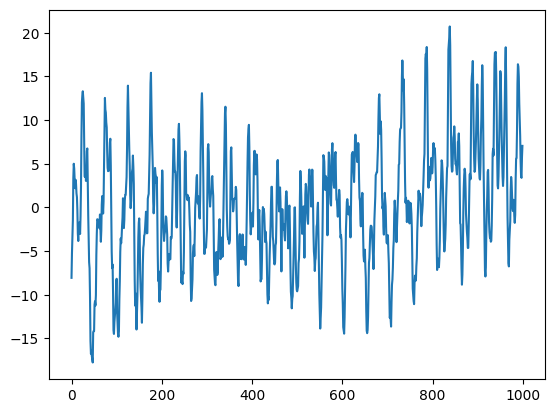

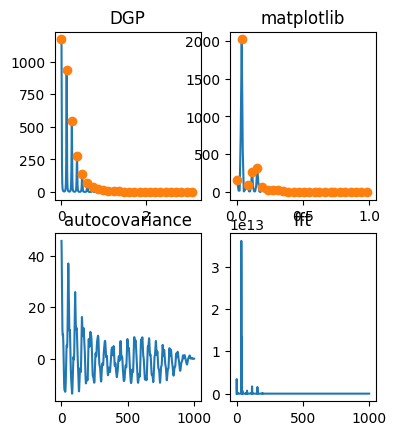

In [1]:
import util

lib_names = ["pandas","numpy", "matplotlib","sklearn","seaborn","tensorflow",
             "torch","tqdm","random","xgboost", "scipy","plotly",
             "cv2","PIL","math","lightgbm","nltk","torchvision",
             "collections", "transformers","catboost","statsmodels","imblearn","wordcloud"]
lib_classes_path = 'lib_classes.pickle' # saved to
util.export_classes_from_modules(lib_names, lib_classes_path)

### 2.2 Extract imported libraries and their alias used in the error notebook dataset

In [ ]:
import imports_parser
import pickle

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error"
res = imports_parser.get_imports_nbs_static(path_err_nbs, imports_parser.get_imports_line_all)
res_pd = pd.DataFrame.from_dict(res)
res_pd["lib_alias"] = res_pd.imports.apply(imports_parser.get_lib_alias)

In [157]:
res_pd.to_excel(path_err_nbs+"/imports_all_info.xlsx", index=False, engine="xlsxwriter")
res_pd

,fname,imports,lib_alias
0,aadyac_ingenium-level3.ipynb,"{(, numpy, np), (tensorflow.keras.utils, plot_...","[[numpy, np], [tensorflow, plot_model], [cv2, ..."
1,abaojiang_eda-on-game-progress.ipynb,"{(typing, Any,, ), (, warnings, ), (, numpy, n...","[[typing, Any,], [warnings, warnings], [numpy,..."
2,abdallahelsayed22_image-segmentation-u-net.ipynb,"{(, cv2, ), (keras.layers, Input,, ), (, imgau...","[[cv2, cv2], [keras, Input,], [imgaug, iaa], [..."
3,abdallahwagih_plant-stress-identification-acc-...,"{(tensorflow.keras.preprocessing.image, ImageD...","[[tensorflow, ImageDataGenerator], [tensorflow..."
4,abdelrahmanmuhsen_semseg-tests.ipynb,"{(, warnings, ), (, cv2, ), (keras.callbacks, ...","[[warnings, warnings], [cv2, cv2], [keras, Mod..."
...,...,...,...
4344,yeohhanyi_cirrhosis-outcomes.ipynb,"{(sklearn.preprocessing, LabelEncoder,, ), (, ...","[[sklearn, LabelEncoder,], [numpy, np], [xgboo..."
4345,yeohqiwei_credit-card-fraud-transaction-classi...,"{(, numpy, np), (math, radians,, ), (imblearn....","[[numpy, np], [math, radians,], [imblearn, ADA..."
4346,zainabmuhammad_house-prices-prediction-ip-proj...,"{(, numpy, np), (scipy, stats, ), (, seaborn, ...","[[numpy, np], [scipy, stats], [seaborn, sns], ..."
4347,zakirkhanaleemi_gemini-api-entrant-notebook.ipynb,"{(, pathlib, ), (, google.ai.generativelanguag...","[[pathlib, pathlib], [google, glm], [IPython, ..."


### 2.3 Extract related libraries from crash lines in tracebacks

In [1]:
import pandas as pd
import pickle
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error"
df_err = pd.read_excel(path_err_nbs + '/nberror_k_p3.xlsx')
df_imports = pd.read_excel(path_err_nbs + '/imports_all_info.xlsx')

In [3]:
df_err["lib2"] = df_err.apply(util.extract_lib_2, lib_names=lib_names, df_imports=df_imports, lib_classes_dict=lib_classes_dict, axis=1)

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception when listing traceback
exception 

In [45]:
1-len(df_err[df_err.lib.isnull()&df_err.lib2.isnull()])/len(df_err)

0.6208677685950413

In [4]:
df_err["lib_parsed"] = df_err["lib2"].fillna(df_err["lib"]).map(util.simple_lib_parser)
df_err.to_excel(path_err_nbs+"/nberror_k_all_p3_lib_parsed.xlsx", index=False, engine='xlsxwriter')

### 2.4 Analyzing the extract crash-related libraries

In [7]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error"
df_err = pd.read_excel(path_err_nbs+"/nberror_k_all_p3_lib_parsed.xlsx")
sum(~df_err.lib_parsed.isna())/len(df_err)

0.6208677685950413

In [130]:
import util

for i in range(90,100):
    util.print_traceback(df_err[df_err.lib.isnull()].traceback.iloc[i])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[70], line 3
      1 inputs = Input((input_shape))
      2 # convolutional layers
----> 3 conv_1 = conv2D(32, kernel_size=(3, 3),activation='relu') (inputs)
      4 maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
      5 conv_2 = conv2D(64, kernel_size=(3, 3),activation='relu') (maxp_1)

NameError: name 'conv2D' is not defined
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[71], line 3
      1 #plot the model
      2 from tensorflow.keras.utils import plot_model
----> 3 plot_model(model)

NameError: name 'model' is not defined
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[19], line 15
      1 image_gen = Im